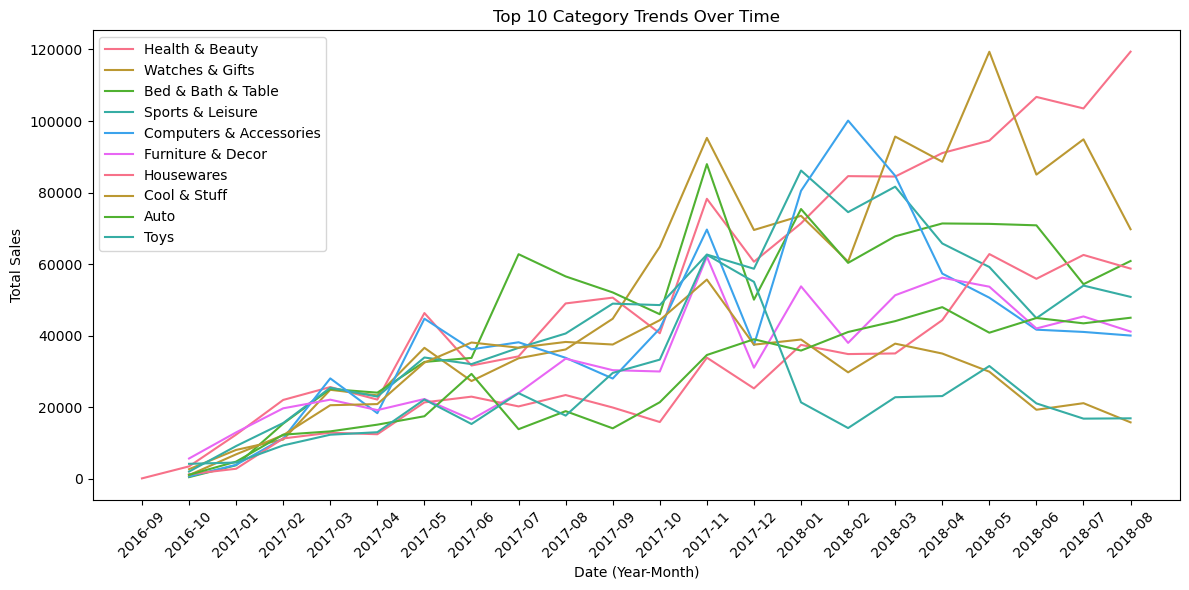

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
categories = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('olist_order_dataset.csv')

# Merge data to obtain product category information
merged_data = order_items.merge(products, on='product_id')
merged_data = merged_data.merge(categories, left_on='product_category_name', right_on='product_category_name')

# Merge order data with product data that have categories
merged_data = merged_data.merge(orders, on='order_id', suffixes=('_left', '_right'))

# Calculate total sales per category
category_sales = merged_data.groupby('product_category_name_english')['price'].sum().reset_index()

# Select the top 10 categories based on sales
top_10_categories = category_sales.nlargest(10, 'price')

# Filter data for only the top categories
filtered_data = merged_data[merged_data['product_category_name_english'].isin(top_10_categories['product_category_name_english'])].copy()

# Convert the 'order_purchase_timestamp' column to datetime type
filtered_data['order_purchase_timestamp'] = pd.to_datetime(filtered_data['order_purchase_timestamp'])

# Extract year and month from the timestamp
filtered_data['year_month'] = filtered_data['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Calculate sales per category per month
monthly_sales = filtered_data.groupby(['product_category_name_english', 'year_month'])['price'].sum().reset_index()

# Plot the top 10 category trends over time
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
for category in top_10_categories['product_category_name_english']:
    category_data = monthly_sales[monthly_sales['product_category_name_english'] == category]
    # Change the legend format
    category_label = category.replace('_', ' & ').title()
    plt.plot(category_data['year_month'], category_data['price'], label=category_label)

plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')
plt.title('Top 10 Category Trends Over Time')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()